<a href="https://colab.research.google.com/github/ScientistLim/ProjectAW/blob/Develop/%EB%8D%B0%EC%9D%B4%ED%84%B0_%EC%A0%84%EC%B2%98%EB%A6%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving 30초간격 시각_유입량_압력 포함.csv to 30초간격 시각_유입량_압력 포함 (1).csv


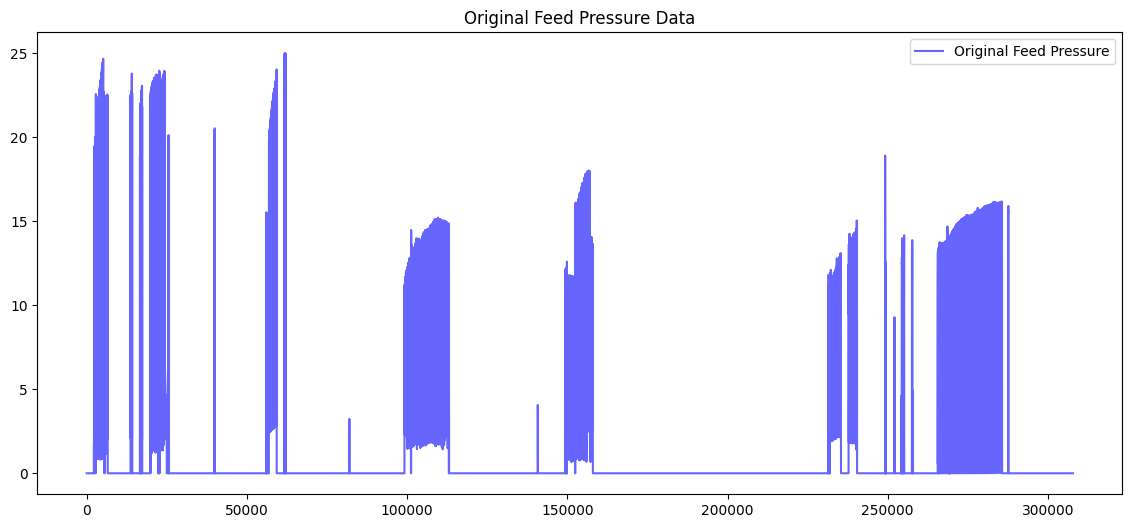

NaN 값 개수: 245786
feed_pressure 값 분포:
 feed_pressure
15.845625    54
15.930000    53
15.877500    50
15.875625    47
15.881250    46
             ..
24.905625     1
24.976875     1
25.005000     1
22.666875     1
3.770625      1
Name: count, Length: 10060, dtype: int64
Before dropna: (307826, 1)
After dropna: (62040, 1)


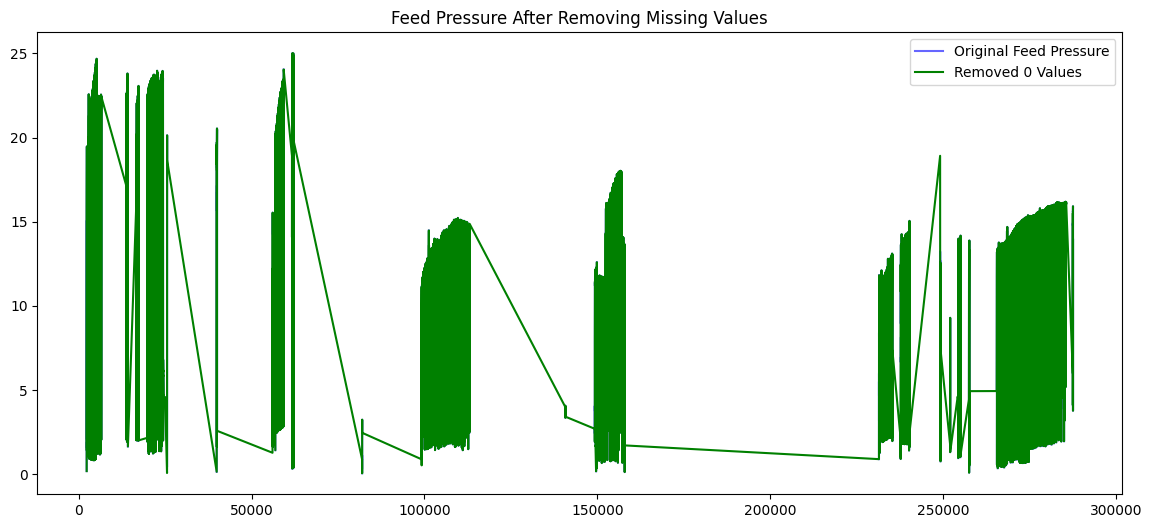

Before Outlier Removal:
       feed_pressure
count   62040.000000
mean       13.520762
std         4.788000
min         0.056250
25%        10.912500
50%        13.535625
75%        15.770625
max        25.006875

After Outlier Removal (IQR):
       feed_pressure
count   57708.000000
mean       13.998529
std         3.897071
min         3.626250
25%        11.251875
50%        13.711875
75%        15.780000
max        23.056875


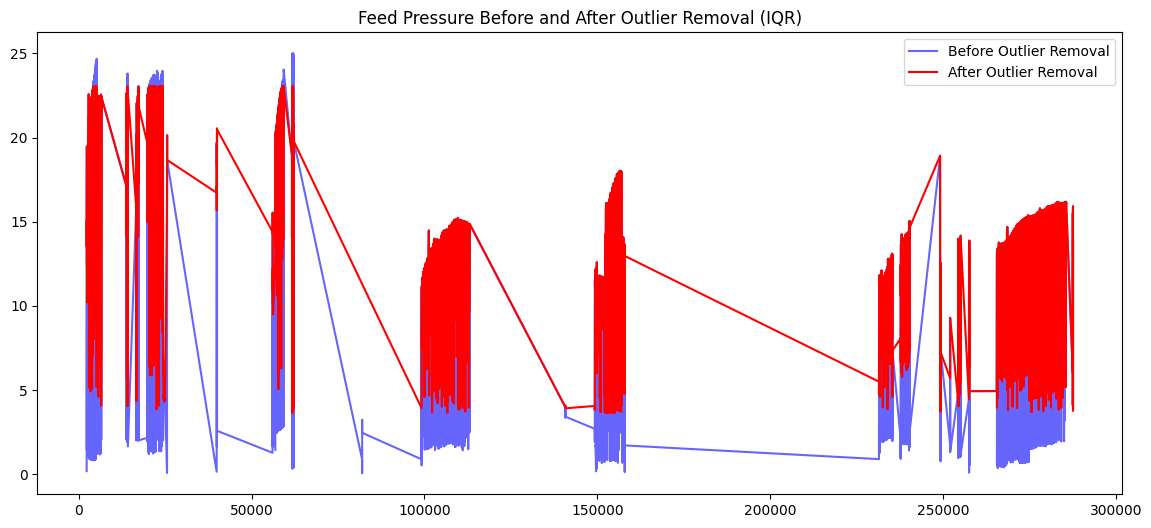

<Figure size 1400x600 with 0 Axes>

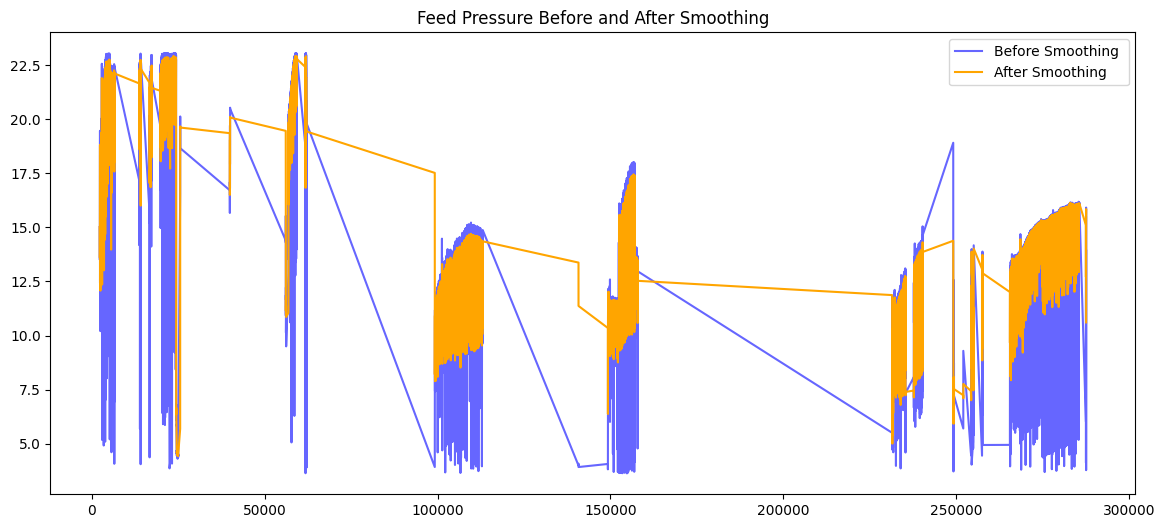

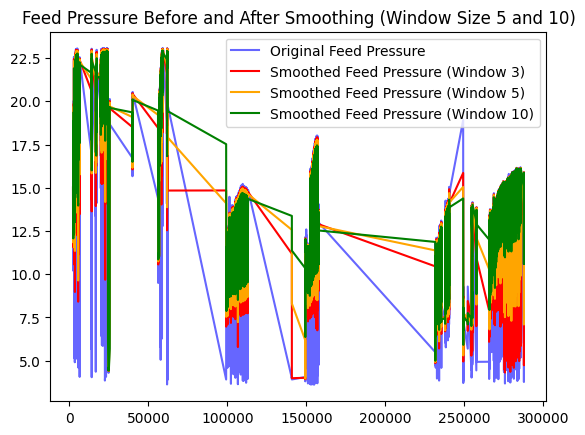

Original Data Statistics:
       feed_pressure
count   57708.000000
mean       13.998529
std         3.897071
min         3.626250
25%        11.251875
50%        13.711875
75%        15.780000
max        23.056875

Smoothed Data Statistics (Window 3):
       feed_pressure
count   57708.000000
mean       13.998545
std         3.831534
min         3.926875
25%        11.249375
50%        13.643750
75%        15.766250
max        23.048125

Smoothed Data Statistics (Window 5):
       feed_pressure
count   57708.000000
mean       13.998558
std         3.797176
min         3.966750
25%        11.246250
50%        13.589250
75%        15.758625
max        23.006625

Smoothed Data Statistics (Window 10):
       feed_pressure
count   57708.000000
mean       13.998712
std         3.744025
min         4.440000
25%        11.305125
50%        13.453781
75%        15.735563
max        22.935750

Volatility (Original): 0.11621512712804133
Volatility (Smoothed Window 3): 0.04825127598994274
Volatil

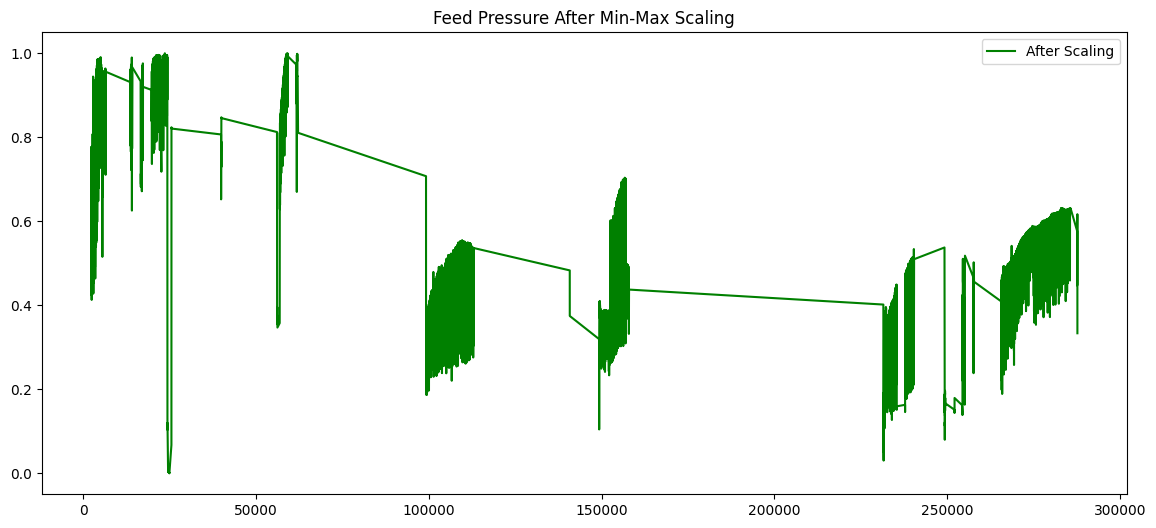

X_train_window10 차원:  (46142, 30, 1)
X_test_window10 차원:  (11536, 30, 1)


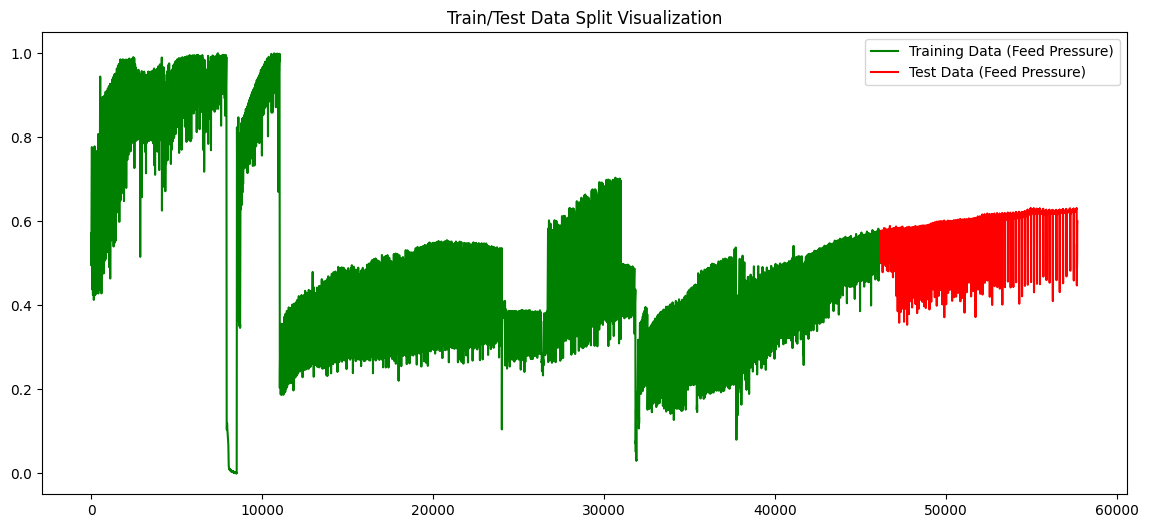

훈련 데이터 크기 (Window 3): (46142, 30, 1), 테스트 데이터 크기 (Window 3): (11536, 30, 1)
훈련 데이터 크기 (Window 5): (46142, 30, 1), 테스트 데이터 크기 (Window 5): (11536, 30, 1)
훈련 데이터 크기 (Window 10): (46142, 30, 1), 테스트 데이터 크기 (Window 10): (11536, 30, 1)

First few sequences (Window 3):
Sequence 1:
[[0.58008106]
 [0.55081062]
 [0.54043276]
 [0.51977512]
 [0.51497026]
 [0.5094463 ]
 [0.50388965]
 [0.50199386]
 [0.50156894]
 [0.5014055 ]
 [0.50294175]
 [0.50529516]
 [0.50908675]
 [0.51196313]
 [0.51562398]
 [0.52095182]
 [0.52680264]
 [0.53340524]
 [0.53804668]
 [0.54562986]
 [0.55389946]
 [0.56311695]
 [0.57011179]
 [0.57661633]
 [0.5854089 ]
 [0.5929594 ]
 [0.6014578 ]
 [0.60832189]
 [0.61829117]
 [0.62659345]]
Label 1:
[0.63548408]


Sequence 2:
[[0.55081062]
 [0.54043276]
 [0.51977512]
 [0.51497026]
 [0.5094463 ]
 [0.50388965]
 [0.50199386]
 [0.50156894]
 [0.5014055 ]
 [0.50294175]
 [0.50529516]
 [0.50908675]
 [0.51196313]
 [0.51562398]
 [0.52095182]
 [0.52680264]
 [0.53340524]
 [0.53804668]
 [0.54562986]
 [

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from google.colab import files

# 시각화를 위한 설정 (Google Colab에서 반드시 필요)
%matplotlib inline

# 1. CSV 파일 업로드
uploaded = files.upload()

# 2. CSV 파일 불러오기 (업로드한 파일 이름을 사용)
file_name = list(uploaded.keys())[0]
df = pd.read_csv(file_name)

# 3. 압력 변수 'PIT.PIT_03.PV' 열 선택 (압력 변수만 사용)
df = df[['PIT.PIT_03.PV']]
df.columns = ['feed_pressure']  # 열 이름을 사용하기 쉽게 변경

# 원본 데이터 시각화
plt.figure(figsize=(14, 6))
plt.plot(df['feed_pressure'], label='Original Feed Pressure', color='blue', alpha=0.6)
plt.title('Original Feed Pressure Data')
plt.legend()
plt.show()

# 0값을 NaN으로 변환
df['feed_pressure'].replace(0, np.nan, inplace=True)

# NaN으로 변환된 값 확인 (NaN 값의 개수 출력 및 0값이 제거된 후의 값 확인)
print("NaN 값 개수:", df['feed_pressure'].isna().sum())
print("feed_pressure 값 분포:\n", df['feed_pressure'].value_counts())

# 4. 결측값 제거 (dropna 사용)
df_removed = df.dropna()

# 결측값 제거 후 확인
print("Before dropna:", df.shape)
print("After dropna:", df_removed.shape)

# 결측값 제거 후 시각화
plt.figure(figsize=(14, 6))
plt.plot(df['feed_pressure'], label='Original Feed Pressure', color='blue', alpha=0.6)
plt.plot(df_removed['feed_pressure'], label='Removed 0 Values', color='green')
plt.title('Feed Pressure After Removing Missing Values')
plt.legend()
plt.show()



# 이상치 제거 전 데이터 통계
print("Before Outlier Removal:")
print(df_removed.describe())  # 결측값 처리 후 데이터

# 5. 이상치 탐지 및 제거 (IQR 기법)
def remove_outliers_iqr(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[~((df < lower_bound) | (df > upper_bound)).any(axis=1)]

df_cleaned = remove_outliers_iqr(df_removed)

# 이상치 제거 후 데이터 통계
print("\nAfter Outlier Removal (IQR):")
print(df_cleaned.describe())  # 이상치 제거 후 데이터

# 이상치 제거 후 시각화
plt.figure(figsize=(14, 6))
plt.plot(df_removed['feed_pressure'], label='Before Outlier Removal', color='blue', alpha=0.6)
plt.plot(df_cleaned['feed_pressure'], label='After Outlier Removal', color='red')
plt.title('Feed Pressure Before and After Outlier Removal (IQR)')
plt.legend()
plt.show()


# 6. 데이터 스무딩(이동 평균 적용) (윈도우 크기 3, 5, 10)
def smooth_data(data, window_size):
    return data.rolling(window=window_size, min_periods=1).mean()

df_smoothed_window3 = df_cleaned.copy()
df_smoothed_window5 = df_cleaned.copy()
df_smoothed_window10 = df_cleaned.copy()

# 윈도우 크기 3 적용
df_smoothed_window3['feed_pressure'] = smooth_data(df_smoothed_window5['feed_pressure'], window_size=3)

# 윈도우 크기 5 적용
df_smoothed_window5['feed_pressure'] = smooth_data(df_smoothed_window5['feed_pressure'], window_size=5)

# 윈도우 크기 10 적용
df_smoothed_window10['feed_pressure'] = smooth_data(df_smoothed_window10['feed_pressure'], window_size=10)

# 7. 결과 시각화
plt.figure(figsize=(14, 6))

# 원본 데이터 시각화
plt.figure(figsize=(14, 6))
plt.plot(df_cleaned['feed_pressure'], label='Before Smoothing ', color='blue', alpha=0.6)
plt.plot(df_smoothed_window10['feed_pressure'], label='After Smoothing', color='orange')
plt.title('Feed Pressure Before and After Smoothing')
plt.legend()
plt.show()

plt.plot(df_cleaned['feed_pressure'], label='Original Feed Pressure', color='blue', alpha=0.6)
plt.plot(df_smoothed_window3['feed_pressure'], label='Smoothed Feed Pressure (Window 3)', color='red')
plt.plot(df_smoothed_window5['feed_pressure'], label='Smoothed Feed Pressure (Window 5)', color='orange')
plt.plot(df_smoothed_window10['feed_pressure'], label='Smoothed Feed Pressure (Window 10)', color='green')
plt.title('Feed Pressure Before and After Smoothing (Window Size 5 and 10)')
plt.legend()
plt.show()

# 8. 이동 평균 전후 통계 값 비교
print("Original Data Statistics:")
print(df_cleaned.describe())

print("\nSmoothed Data Statistics (Window 3):")
print(df_smoothed_window3.describe())

print("\nSmoothed Data Statistics (Window 5):")
print(df_smoothed_window5.describe())

print("\nSmoothed Data Statistics (Window 10):")
print(df_smoothed_window10.describe())

# 9. 이동 평균 전후의 변화율 비교 (변동성 비교)
def calculate_volatility(data):
    return data.pct_change().std()

volatility_original = calculate_volatility(df_cleaned['feed_pressure'])
volatility_window3 = calculate_volatility(df_smoothed_window3['feed_pressure'])
volatility_window5 = calculate_volatility(df_smoothed_window5['feed_pressure'])
volatility_window10 = calculate_volatility(df_smoothed_window10['feed_pressure'])

print(f"\nVolatility (Original): {volatility_original}")
print(f"Volatility (Smoothed Window 3): {volatility_window3}")
print(f"Volatility (Smoothed Window 5): {volatility_window5}")
print(f"Volatility (Smoothed Window 10): {volatility_window10}")


# 10. 데이터 정규화 (Min-Max 정규화 사용)
scaler = MinMaxScaler()
df_smoothed_window3[['feed_pressure']] = scaler.fit_transform(df_smoothed_window3[['feed_pressure']])
df_smoothed_window5[['feed_pressure']] = scaler.fit_transform(df_smoothed_window5[['feed_pressure']])
df_smoothed_window10[['feed_pressure']] = scaler.fit_transform(df_smoothed_window10[['feed_pressure']])

# 정규화 후 시각화
plt.figure(figsize=(14, 6))
plt.plot(df_smoothed_window10['feed_pressure'], label='After Scaling', color='green')
plt.title('Feed Pressure After Min-Max Scaling')
plt.legend()
plt.show()

#11. 시계열 데이터 시퀀스 생성 함수

def create_sequences(data, sequence_length):
    sequences = []
    labels = []
    for i in range(len(data) - sequence_length):
        sequence = data[i:i+sequence_length]  # 시퀀스 생성
        label = data[i+sequence_length]  # 레이블 생성
        sequences.append(sequence)
        labels.append(label)
    # 배열을 명확히 3차원으로 반환
    return np.array(sequences).reshape(-1, sequence_length, 1), np.array(labels)


# 시퀀스 길이 설정
sequence_length = 30
#윈도우 크기 3 시퀀스 생성
X_window3, y_window3 = create_sequences(df_smoothed_window3[['feed_pressure']].values, sequence_length)
# 윈도우 크기 5 시퀀스 생성
X_window5, y_window5 = create_sequences(df_smoothed_window5['feed_pressure'].values, sequence_length)
# 윈도우 크기 10 시퀀스 생성
X_window10, y_window10 = create_sequences(df_smoothed_window10['feed_pressure'].values, sequence_length)


# 9. 훈련 데이터와 테스트 데이터 분할
X_train_window3, X_test_window3, y_train_window3, y_test_window3 = train_test_split(X_window3, y_window3, test_size=0.2, shuffle=False)
X_train_window5, X_test_window5, y_train_window5, y_test_window5 = train_test_split(X_window5, y_window5, test_size=0.2, shuffle=False)
X_train_window10, X_test_window10, y_train_window10, y_test_window10 = train_test_split(X_window10, y_window10, test_size=0.2, shuffle=False)

# 반환된 배열 차원 확인
print("X_train_window10 차원: ", X_train_window10.shape)
# 반환된 배열 차원 확인
print("X_test_window10 차원: ", X_test_window10.shape)


# 훈련 데이터 시각화
plt.figure(figsize=(14, 6))
plt.plot(range(len(X_train_window10)), X_train_window10[:, 0, 0], label='Training Data (Feed Pressure)', color='green')
plt.plot(range(len(X_train_window10), len(X_train_window10) + len(X_test_window10)),
         X_test_window10[:, 0, 0], label='Test Data (Feed Pressure)', color='red')
plt.title('Train/Test Data Split Visualization')
plt.legend()
plt.show()

# 훈련 및 테스트 데이터 크기 확인
print(f"훈련 데이터 크기 (Window 3): {X_train_window3.shape}, 테스트 데이터 크기 (Window 3): {X_test_window3.shape}")
print(f"훈련 데이터 크기 (Window 5): {X_train_window5.shape}, 테스트 데이터 크기 (Window 5): {X_test_window5.shape}")
print(f"훈련 데이터 크기 (Window 10): {X_train_window10.shape}, 테스트 데이터 크기 (Window 10): {X_test_window10.shape}")



# 샘플링을 통해 시퀀스와 레이블을 확인하는 함수 (윈도우 크기 3, 5, 10에 대해 각각 확인)
samples_to_check = 5

def sample_sequences(X_train, y_train, window_size):
    print(f"\nFirst few sequences (Window {window_size}):")
    for i in range(samples_to_check):
        print(f"Sequence {i + 1}:")
        print(X_train[i])  # 시퀀스 출력
        print(f"Label {i + 1}:")
        print(y_train[i])
        print("\n")

    middle_index = len(X_train) // 2
    print(f"\nMiddle few sequences (Window {window_size}):")
    for i in range(middle_index, middle_index + samples_to_check):
        print(f"Sequence {i + 1}:")
        print(X_train[i])
        print(f"Label {i + 1}:")
        print(y_train[i])
        print("\n")

    print(f"\nLast few sequences (Window {window_size}):")
    for i in range(-samples_to_check, 0):
        print(f"Sequence {i + 1}:")
        print(X_train[i])
        print(f"Label {i + 1}:")
        print(y_train[i])
        print("\n")

# 윈도우 크기별 시퀀스 샘플링 확인
sample_sequences(X_train_window3, y_train_window3, window_size=3)
sample_sequences(X_train_window5, y_train_window5, window_size=5)
sample_sequences(X_train_window10, y_train_window10, window_size=10)